#**Nutritional Analysis On McDonald's menu**

##Analysis and Insights

In [1]:
import numpy as np
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline

In [2]:
df=pd.read_csv('menu.csv')
df.tail()

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
255,Smoothies & Shakes,McFlurry with Oreo Cookies (Small),10.1 oz (285 g),510,150,17.0,26,9.0,44,0.5,...,80,27,1,4,64,12,15,0,40,8
256,Smoothies & Shakes,McFlurry with Oreo Cookies (Medium),13.4 oz (381 g),690,200,23.0,35,12.0,58,1.0,...,106,35,1,5,85,15,20,0,50,10
257,Smoothies & Shakes,McFlurry with Oreo Cookies (Snack),6.7 oz (190 g),340,100,11.0,17,6.0,29,0.0,...,53,18,1,2,43,8,10,0,25,6
258,Smoothies & Shakes,McFlurry with Reese's Peanut Butter Cups (Medium),14.2 oz (403 g),810,290,32.0,50,15.0,76,1.0,...,114,38,2,9,103,21,20,0,60,6
259,Smoothies & Shakes,McFlurry with Reese's Peanut Butter Cups (Snack),7.1 oz (202 g),410,150,16.0,25,8.0,38,0.0,...,57,19,1,5,51,10,10,0,30,4


In [3]:
df.shape

(260, 24)

##Check for Null values

<Axes: >

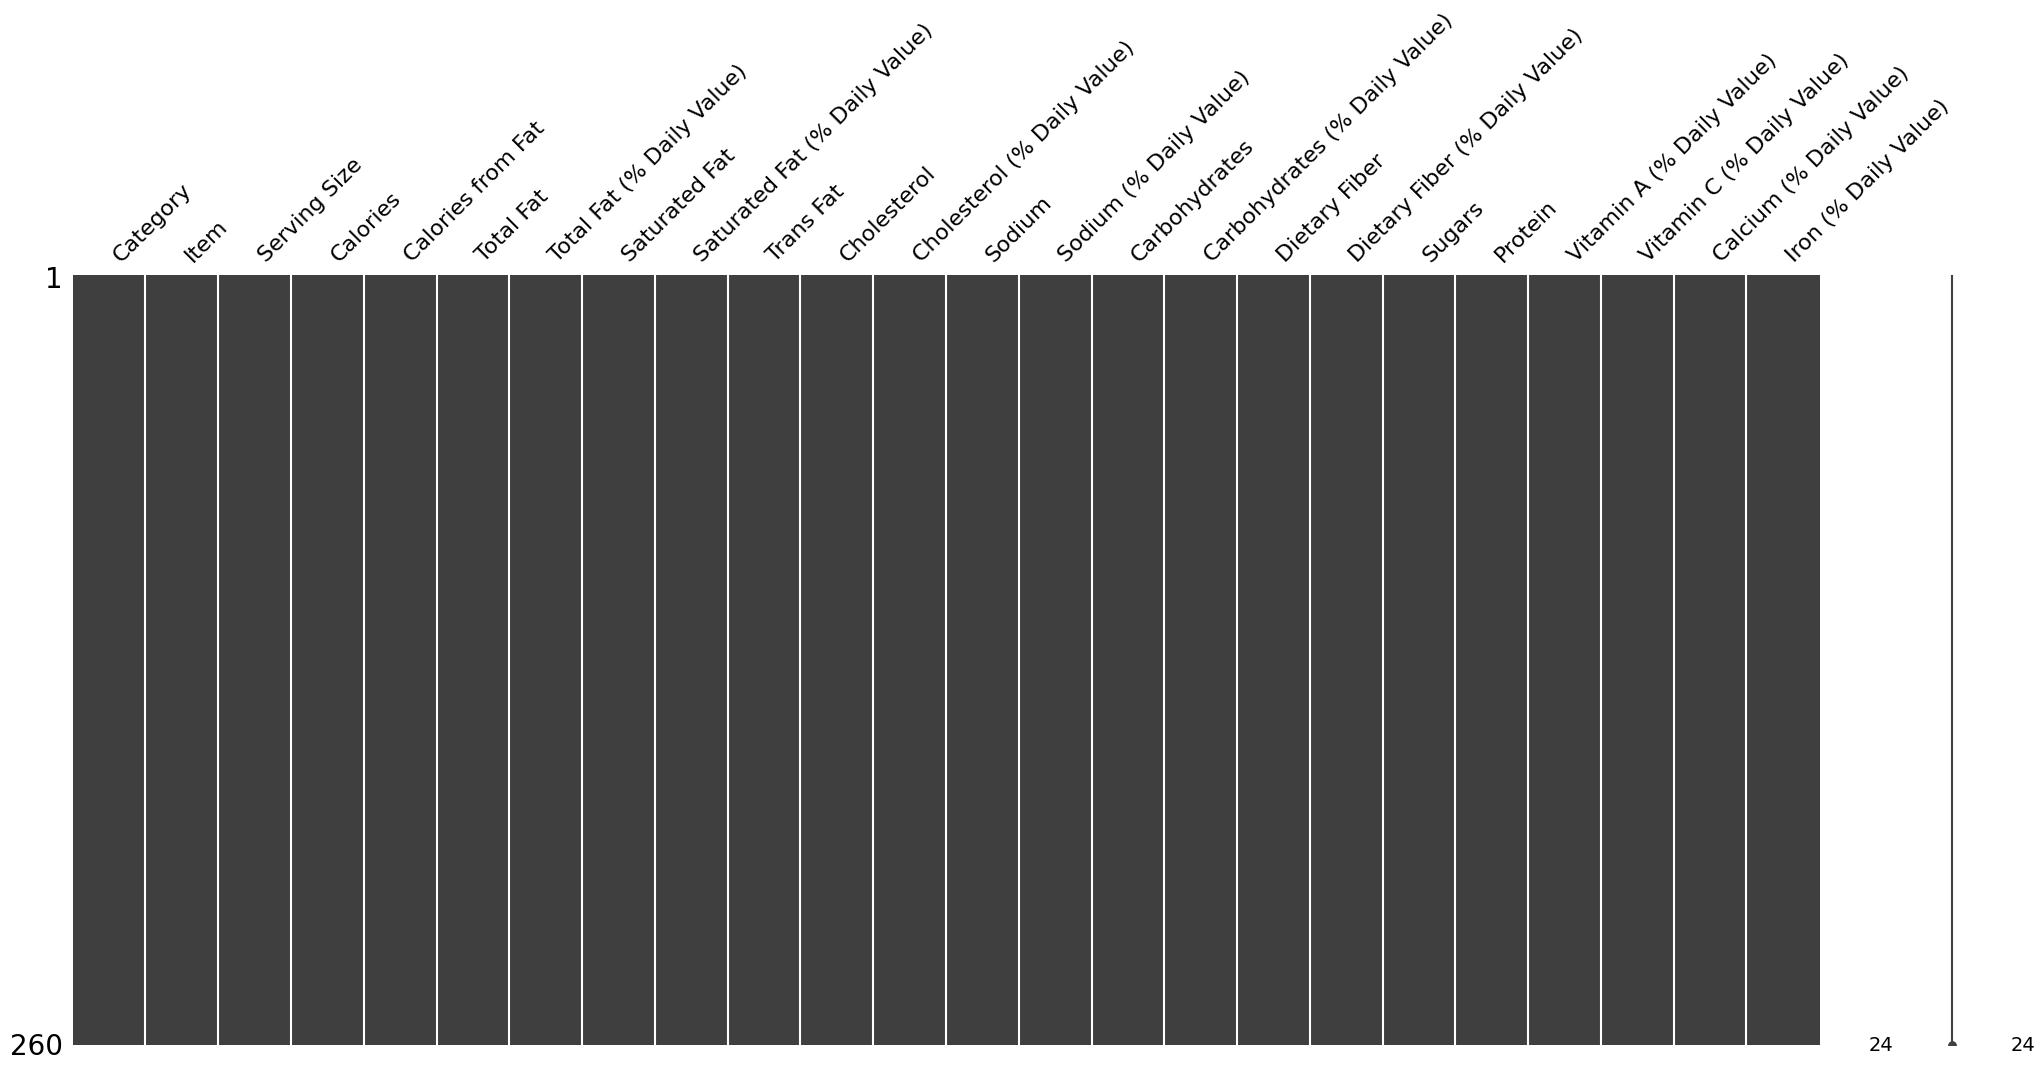

In [4]:
msno.matrix(df)

In [5]:
df.isna().sum()

Category                         0
Item                             0
Serving Size                     0
Calories                         0
Calories from Fat                0
Total Fat                        0
Total Fat (% Daily Value)        0
Saturated Fat                    0
Saturated Fat (% Daily Value)    0
Trans Fat                        0
Cholesterol                      0
Cholesterol (% Daily Value)      0
Sodium                           0
Sodium (% Daily Value)           0
Carbohydrates                    0
Carbohydrates (% Daily Value)    0
Dietary Fiber                    0
Dietary Fiber (% Daily Value)    0
Sugars                           0
Protein                          0
Vitamin A (% Daily Value)        0
Vitamin C (% Daily Value)        0
Calcium (% Daily Value)          0
Iron (% Daily Value)             0
dtype: int64

##Unique values in Category Column

In [6]:
df.Category.unique()

array(['Breakfast', 'Beef & Pork', 'Chicken & Fish', 'Salads',
       'Snacks & Sides', 'Desserts', 'Beverages', 'Coffee & Tea',
       'Smoothies & Shakes'], dtype=object)

###Below we analyse the count for each Category in McDonald's menu. We observe that Coffee and Tea has been consumed heavily by the customers

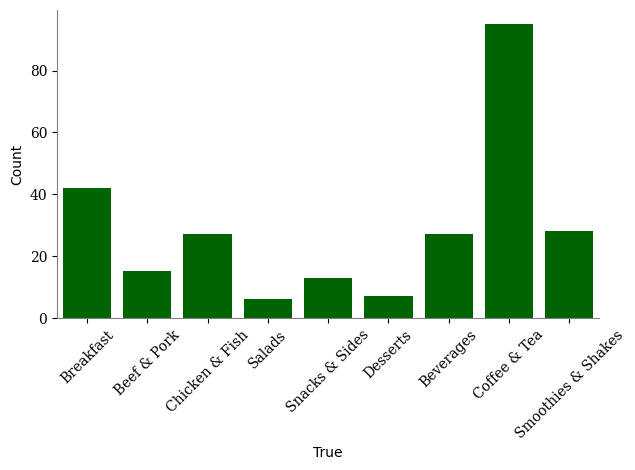

In [7]:
plt.style.use('default')
plt.figure(figsize=(7,4),edgecolor='0.1',dpi=100)
a=sns.countplot(x='Category',facecolor='darkgreen',data=df)


xticks=plt.xticks(rotation=45,family='serif')
yticks=plt.yticks(family='serif')

plt.xlabel(df['Category'].all())
plt.ylabel('Count')

a.spines['bottom'].set_color('gray')
a.spines['left'].set_color('gray')
sns.despine()

dpi :
The resolution of the figure in dots-per-inch

##Analysis of Number of Items per Category
Below we observe that Coffee and Tea category has the most number of unique items followed by Breakfast in the menu.

In [8]:
px.density_heatmap(x='Category',y='Item',data_frame=df,width=900)

##Analysis of Nutrients

Average Calories distribution for each category
Below we observe hightest amount of calories for Chicken & fish followed by Breakfast and Smoothies

In [9]:
calories=pd.DataFrame(df.groupby('Category')['Calories'].mean())

colors=['gray']*9
colors[3]='#AF0038'
fig = go.Figure(data=[go.Bar(
    x=calories.index,
    y=calories['Calories'],
    marker_color=colors
)])
fig.update_layout(width=700,height=500)
fig.update_yaxes(title='Avg Calories')
fig.update_xaxes(title='Categories')
fig.show()

##Total Fat
Below is the avg Total Fat distribution for each category.We have breakfast ,Chicken & Fish and Beef & Pork at the forefront when it comes to the amount of Fat intake by us.

In [10]:
fat=pd.DataFrame(df.groupby('Category')['Total Fat'].mean())

colors=['gray']*9
colors[2]='#C4451C'
fig = go.Figure(data=[go.Bar(
    x=fat.index,
    y=fat['Total Fat'],
    marker_color=colors
)])
fig.update_yaxes(title='Avg Total Fat')
fig.update_layout(width=700,height=500)
fig.show()

##Carbohydrates
We see that Smoothies & Shakes have the highest Average Carbohydrates as compared to other Categories in the menu.

In [11]:
carbs=pd.DataFrame(df.groupby('Category')['Carbohydrates'].mean())

colors=['gray']*9
colors[7]='#B82E2E'
fig = go.Figure(data=[go.Bar(
    x=carbs.index,
    y=carbs['Carbohydrates'],
    marker_color=colors
)])
fig.update_yaxes(title='Avg Carbohydrates')
fig.update_layout(width=700,height=500)
fig.show()

##Sugars
Carbohydrates are an essential macronutrient the body requires in large amounts to run smoothly, but not all carbs are created equal. Sugars mostly make up carbohydrates.Thus we have Smoothies and Shakes with high Average Sugars Distributions

In [12]:
sugars=pd.DataFrame(df.groupby('Category')['Sugars'].mean())

colors=['gray']*9
colors[7]='#B82E2E'
fig = go.Figure(data=[go.Bar(
    x=sugars.index,
    y=sugars['Sugars'],
    marker_color=colors
)])
fig.update_yaxes(title='Avg Sugars')
fig.update_layout(width=700,height=500)
fig.show()

##Protein
Large amount of proteins are observed in Chicken & Fish followed by Beef & Pork

In [13]:
protein=pd.DataFrame(df.groupby('Category')['Protein'].mean())

colors=['gray']*9
colors[3]='#1C8356'
fig = go.Figure(data=[go.Bar(
    x=protein.index,
    y=protein['Protein'],
    marker_color=colors
)])
fig.update_yaxes(title='Avg Protein')
fig.update_layout(width=700,height=500)
fig.show()

##Cholesterol

In [14]:
chol=pd.DataFrame(df.groupby('Category')['Cholesterol'].mean())

colors=['gray']*9
colors[2]='#85660D'
fig = go.Figure(data=[go.Bar(
    x=chol.index,
    y=chol['Cholesterol'],
    marker_color=colors
)])
fig.update_yaxes(title='Avg Cholesterol')
fig.update_layout(width=700,height=500)
fig.show()

###Below we analyze how are Carbohydrates and Sugars related

Text(0.5, 1.05, 'Carbohydrates vs Sugars')

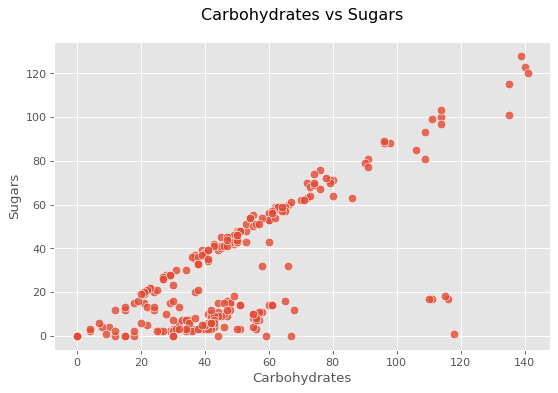

In [15]:
plt.style.use('ggplot')
plt.figure(figsize=(8,5),dpi=80)
sns.scatterplot(x='Carbohydrates',y='Sugars',data=df,alpha=0.8,s=60)
plt.title('Carbohydrates vs Sugars',x=0.5,y=1.05)

##Average Nutrient Analysis(% Daily Value) for each of the Categories

In [16]:
cols=['Vitamin A (% Daily Value)','Vitamin C (% Daily Value)','Calcium (% Daily Value)',
      'Iron (% Daily Value)','Total Fat (% Daily Value)',
      'Cholesterol (% Daily Value)','Carbohydrates (% Daily Value)']

table=df.pivot_table(columns='Category',values=cols)
table.style.background_gradient(cmap='viridis')

Category,Beef & Pork,Beverages,Breakfast,Chicken & Fish,Coffee & Tea,Desserts,Salads,Smoothies & Shakes,Snacks & Sides
Calcium (% Daily Value),23.000000,2.962963,16.166667,15.444444,28.294737,11.428571,15.000000,35.571429,6.000000
Carbohydrates (% Daily Value),13.466667,9.592593,16.571429,16.333333,14.863158,11.571429,7.166667,30.142857,9.615385
Cholesterol (% Daily Value),28.933333,0.185185,50.952381,25.222222,9.378947,4.857143,17.333333,14.714286,6.230769
Iron (% Daily Value),23.333333,0.296296,17.142857,16.370370,2.147368,4.000000,10.333333,3.964286,6.615385
Total Fat (% Daily Value),38.600000,0.148148,42.666667,41.333333,12.357895,11.142857,18.333333,21.714286,16.230769
Vitamin A (% Daily Value),6.933333,0.740741,6.928571,20.444444,10.736842,5.142857,146.666667,18.750000,4.846154
Vitamin C (% Daily Value),7.333333,23.481481,8.904762,12.629630,0.000000,4.142857,28.333333,6.964286,28.153846


In [17]:
import plotly.express as px
#df = px.data.menu()
fig = px.scatter(df, x="Total Fat (% Daily Value)",y='Cholesterol (% Daily Value)', color="Category",
                 size='Calories', hover_name="Item",trendline="ols",
                 template="plotly_dark",marginal_x="box",marginal_y="box")
fig.show()

In [18]:
fig = px.scatter(df, x="Carbohydrates (% Daily Value)",y='Sugars', color="Category",
                 size='Calories', hover_name="Item",trendline="ols",
                 template="plotly_dark",marginal_x="box",marginal_y="box")
fig.show()

In [19]:
fig = px.scatter(df, x="Carbohydrates (% Daily Value)",y='Protein', color="Category",
                 size='Calories', hover_name="Item",trendline="ols",template="plotly_dark",
                 marginal_x="box",marginal_y="box")
fig.show()

In [20]:
fig = px.scatter(df, x='Dietary Fiber (% Daily Value)',y='Vitamin C (% Daily Value)', color="Category",
                 size='Calories',  hover_name="Item",
                 trendline="ols",template="plotly_dark",marginal_x="box",marginal_y="box")
fig.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1752: RuntimeWarning:

invalid value encountered in double_scalars



In [21]:
fig = px.scatter(df, x='Protein',y='Sugars', color="Category",size='Calories',
                 hover_name="Item",trendline="ols",template="plotly_dark",marginal_x="box",marginal_y="box")
fig.show()

###For each Category below we analyze the items with highest amount of Nutrients in the Mc Donald's menu

<br>

##Breakfast

In [22]:
breakfast=df[df['Category']=='Beef & Pork']
cols=['Calories','Total Fat','Carbohydrates','Sodium','Protein','Dietary Fiber']
for col in cols:
    print(col)
    a=breakfast.groupby('Item')[col].max().sort_values(ascending=False).head(1)
    print(a)
    print('-'*40)
    print('\n')

Calories
Item
Double Quarter Pounder with Cheese    750
Name: Calories, dtype: int64
----------------------------------------


Total Fat
Item
Double Quarter Pounder with Cheese    43.0
Name: Total Fat, dtype: float64
----------------------------------------


Carbohydrates
Item
Bacon Clubhouse Burger    51
Name: Carbohydrates, dtype: int64
----------------------------------------


Sodium
Item
Bacon Clubhouse Burger    1470
Name: Sodium, dtype: int64
----------------------------------------


Protein
Item
Double Quarter Pounder with Cheese    48
Name: Protein, dtype: int64
----------------------------------------


Dietary Fiber
Item
Bacon Clubhouse Burger    4
Name: Dietary Fiber, dtype: int64
----------------------------------------


